In [1]:
import json

In [2]:
with open('Indian_Number_plates.json') as f:
    lines = f.readlines()

In [3]:
json.loads(lines[0])

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.7220843672456576, 'y': 0.5879828326180258},
    {'x': 0.8684863523573201, 'y': 0.6888412017167382}],
   'imageWidth': 806,
   'imageHeight': 466}],
 'extras': None}

In [4]:
d={}

In [5]:
for index,line in enumerate(lines):
    info = json.loads(line)
    d[index] = info
    if len(info['annotation'][0]['points'])!=2:
        print("{} has {}".format(index+1, len(info['index']['annotation'][0]['points']))) 

In [6]:
d[0]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.7220843672456576, 'y': 0.5879828326180258},
    {'x': 0.8684863523573201, 'y': 0.6888412017167382}],
   'imageWidth': 806,
   'imageHeight': 466}],
 'extras': None}

In [7]:
with open('dicted.json','w')as f:
    json.dump(d,f)

In [8]:
len(d)

237

In [9]:
d[1]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.16194331983805668, 'y': 0.8507795100222717},
    {'x': 0.582995951417004, 'y': 1}],
   'imageWidth': 494,
   'imageHeight': 449}],
 'extras': None}

In [10]:
# Download and prepare the dataset

In [11]:
import os
import requests
from PIL import Image
import urllib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import matplotlib.patches as patch

In [12]:
data_dict={}
img_save_dir=os.path.join('data','obj')

In [13]:
os.makedirs(img_save_dir, exist_ok=True)

In [14]:
for key, value in tqdm(d.items()):
    resp = urllib.request.urlopen(value['content'])
    image_PIL = Image.open(resp)
    #image_PIL = Image.fromarray(img)
    image_PIL.save(os.path.join(img_save_dir,str(key+1)+'.png'))
    data_dict[key+1]={"path": os.path.join(img_save_dir,str(key+1)+'.png'),
                      "shape": image_PIL.size,
                      "points": value['annotation'][0]['points']}

In [15]:
image_PIL.size

(395, 147)

In [16]:
with open('essentials.json','w')as f:
    json.dump(data_dict,f)

In [17]:
data_dict

{1: {'path': 'data/obj/1.png',
  'shape': (806, 466),
  'points': [{'x': 0.7220843672456576, 'y': 0.5879828326180258},
   {'x': 0.8684863523573201, 'y': 0.6888412017167382}]},
 2: {'path': 'data/obj/2.png',
  'shape': (494, 449),
  'points': [{'x': 0.16194331983805668, 'y': 0.8507795100222717},
   {'x': 0.582995951417004, 'y': 1}]},
 3: {'path': 'data/obj/3.png',
  'shape': (500, 314),
  'points': [{'x': 0.082, 'y': 0.697452229299363},
   {'x': 0.23, 'y': 0.8280254777070064}]},
 4: {'path': 'data/obj/4.png',
  'shape': (500, 469),
  'points': [{'x': 0.434, 'y': 0.6673773987206824},
   {'x': 0.718, 'y': 0.7654584221748401}]},
 5: {'path': 'data/obj/5.png',
  'shape': (1001, 563),
  'points': [{'x': 0.2087912087912088, 'y': 0.3907637655417407},
   {'x': 0.8651348651348651, 'y': 0.9840142095914742}]},
 6: {'path': 'data/obj/6.png',
  'shape': (416, 431),
  'points': [{'x': 0.2548076923076923, 'y': 0.6496519721577726},
   {'x': 0.6274038461538461, 'y': 0.777262180974478}]},
 7: {'path': 'd

In [18]:
true_crops={}

In [19]:
for key, value in tqdm(data_dict.items()):
    start = (value['points'][0]['x']*value['shape'][0], value['points'][0]['y']*value['shape'][1])
    end = (value['points'][1]['x']*value['shape'][0], value['points'][1]['y']*value['shape'][1])
    true_crops[value['path']] = {'start': (int(start[0]),int(start[1])),
                                 'end': (int(end[0]),int(end[1])),
                                 'tot_shape': value['shape']}

In [20]:
coords = true_crops[os.path.join(img_save_dir,'1.png')]

In [21]:
print(coords)

{'start': (582, 274), 'end': (700, 321), 'tot_shape': (806, 466)}


In [22]:
def getplate(x):
    img = Image.open(x)
    coords = true_crops[x]
    plate = img.crop((coords['start'][0], coords['start'][1],
                     coords['end'][0], coords['end'][1]))
    return plate, img

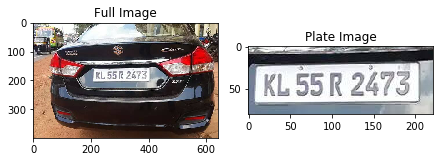

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, constrained_layout=True)

ax[0].set_title('Full Image')
ax[1].set_title('Plate Image')

plate, img = getplate(os.path.join(img_save_dir,'11.png'))
ax[0].imshow(img)
ax[1].imshow(plate)

In [24]:
with open('true_crops.json','w')as f:
    json.dump(true_crops,f)

In [25]:
true_crops

{'data/obj/1.png': {'start': (582, 274),
  'end': (700, 321),
  'tot_shape': (806, 466)},
 'data/obj/2.png': {'start': (80, 382),
  'end': (288, 449),
  'tot_shape': (494, 449)},
 'data/obj/3.png': {'start': (41, 219),
  'end': (115, 260),
  'tot_shape': (500, 314)},
 'data/obj/4.png': {'start': (217, 313),
  'end': (359, 359),
  'tot_shape': (500, 469)},
 'data/obj/5.png': {'start': (209, 220),
  'end': (866, 554),
  'tot_shape': (1001, 563)},
 'data/obj/6.png': {'start': (106, 280),
  'end': (261, 335),
  'tot_shape': (416, 431)},
 'data/obj/7.png': {'start': (227, 241),
  'end': (444, 315),
  'tot_shape': (551, 455)},
 'data/obj/8.png': {'start': (267, 248),
  'end': (396, 320),
  'tot_shape': (550, 537)},
 'data/obj/9.png': {'start': (644, 507),
  'end': (892, 578),
  'tot_shape': (1569, 1119)},
 'data/obj/10.png': {'start': (674, 364),
  'end': (957, 572),
  'tot_shape': (1632, 918)},
 'data/obj/11.png': {'start': (200, 138),
  'end': (422, 219),
  'tot_shape': (642, 400)},
 'data

In [26]:
inYolo={}

In [27]:
for key,value in tqdm(true_crops.items()):
    midX = (value['start'][0]+value['end'][0])/2
    midY = (value['start'][1]+value['end'][1])/2
    width = (value['end'][0] - value['start'][0])
    hieght = (value['end'][1] - value['start'][1])
    stepX = 1./value['tot_shape'][0]
    stepY = 1./value['tot_shape'][1]
    classID = 0
    midX *= stepX
    midY *= stepY
    width *= stepX
    hieght *= stepY
    inYolo[key]= '{} {} {} {} {}'.format(classID, midX, midY, width, hieght)

In [28]:
inYolo

{'data/obj/1.png': '0 0.7952853598014888 0.6384120171673819 0.14640198511166252 0.10085836909871244',
 'data/obj/2.png': '0 0.3724696356275304 0.9253897550111359 0.42105263157894735 0.14922048997772827',
 'data/obj/3.png': '0 0.156 0.7627388535031847 0.148 0.1305732484076433',
 'data/obj/4.png': '0 0.5760000000000001 0.7164179104477612 0.28400000000000003 0.09808102345415778',
 'data/obj/5.png': '0 0.5369630369630369 0.6873889875666075 0.6563436563436563 0.5932504440497336',
 'data/obj/6.png': '0 0.4411057692307693 0.7134570765661252 0.37259615384615385 0.12761020881670532',
 'data/obj/7.png': '0 0.6088929219600726 0.610989010989011 0.3938294010889292 0.16263736263736264',
 'data/obj/8.png': '0 0.6027272727272728 0.5288640595903166 0.23454545454545456 0.1340782122905028',
 'data/obj/9.png': '0 0.4894837476099426 0.4848078641644325 0.15806246016571063 0.06344950848972297',
 'data/obj/10.png': '0 0.4996936274509804 0.5098039215686275 0.17340686274509803 0.22657952069716777',
 'data/obj/1

In [29]:
for key, value in tqdm(inYolo.items()):
    with open(key[:-3]+'txt','w')as f:
        f.write(value)

In [30]:
total_count = len(inYolo)
print("Total data points : {}".format(total_count))
split_per = 5
test_count = int((split_per/100)*total_count)
train_count = total_count - test_count
print("Train data points : {}".format(train_count))
print("Test data points : {}".format(test_count))

Total data points : 237
Train data points : 226
Test data points : 11


In [31]:
train=[]
test=[]
counter=0
for key,value in inYolo.items():
    if counter < train_count:
        train.append(key+'\n')
        counter += 1
    else:
        test.append(key+'\n')

In [32]:
print(len(train))
print(len(test))

226
11


In [33]:
with open(os.path.join('darknet','cfg','train.txt'),'w') as f:
    f.writelines(train)
with open(os.path.join('darknet','cfg','test.txt'),'w') as f:
    f.writelines(test)